# Custom Dumbbell Plot with Matplotlib
This notebook is purely an exercise in plot aesthetics. As such, not all states will be shown, but I will show the top 5 most Democratic and Republican states (by election margins of the 2020 presidential election) [according to Politico](https://www.politico.com/2020-election/results/president/).

NOTE: I copy and paste the entire cell at every step for those among us that want to copy and paste to look over the entire product later. Forgive the long notebook. Of course, you could do this step by step and keep editing the same Axes object in different cells. Feel free to ask questions on [Twitter](https://twitter.com/MitchsWorkshop) or in real-time on [Twitch](https://twitch.tv/MitchsWorkshop)!

### Import libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use("fivethirtyeight")

In [2]:
edu = pd.read_csv("states_all.csv")
edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


### I want the last 10 years of data, what's the most recent one?

In [3]:
edu["YEAR"].max()

2019

### 2009-2019 it is. We only need those two years for our plot.

In [4]:
edu_10yr = edu[edu["YEAR"].isin([2009,2019])]
edu_10yr

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
867,2009_ALABAMA,ALABAMA,2009,745668.0,7186390.0,728795.0,4161103.0,2296492.0,7815467.0,3836398.0,...,59512.0,57027.0,48164.0,464601.0,219495.0,748889.0,228.0,269.0,216.0,255.0
868,2009_ALASKA,ALASKA,2009,130236.0,2158970.0,312667.0,1357747.0,488556.0,2396412.0,1129756.0,...,10046.0,9626.0,9779.0,78545.0,40837.0,131661.0,237.0,283.0,211.0,259.0
869,2009_ARIZONA,ARIZONA,2009,981303.0,8802515.0,1044140.0,3806064.0,3952311.0,9580393.0,4296503.0,...,83686.0,82163.0,79283.0,666897.0,317397.0,1077831.0,230.0,277.0,210.0,258.0
870,2009_ARKANSAS,ARKANSAS,2009,474423.0,4753142.0,534510.0,3530487.0,688145.0,5017352.0,2417974.0,...,36479.0,35715.0,30567.0,292256.0,136213.0,480559.0,238.0,276.0,216.0,258.0
871,2009_CALIFORNIA,CALIFORNIA,2009,6234155.0,73958896.0,9745250.0,40084244.0,24129402.0,74766086.0,35617964.0,...,465866.0,472856.0,478503.0,3717166.0,1997064.0,6263438.0,232.0,270.0,210.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


### Looks like a lot of nulls in 2019, let's check

In [5]:
edu_10yr[edu_10yr["YEAR"]==2019].isnull().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL                          53
TOTAL_REVENUE                   53
FEDERAL_REVENUE                 53
STATE_REVENUE                   53
LOCAL_REVENUE                   53
TOTAL_EXPENDITURE               53
INSTRUCTION_EXPENDITURE         53
SUPPORT_SERVICES_EXPENDITURE    53
OTHER_EXPENDITURE               53
CAPITAL_OUTLAY_EXPENDITURE      53
GRADES_PK_G                     53
GRADES_KG_G                     53
GRADES_4_G                      53
GRADES_8_G                      53
GRADES_12_G                     53
GRADES_1_8_G                    53
GRADES_9_12_G                   53
GRADES_ALL_G                    53
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE              0
AVG_READING_8_SCORE              0
dtype: int64

### Looks like the personnel counts are missing, but the test scores are there. We can work with that. Let's subset by our most Republican and Democratic states.

In [6]:
r_states = [
    "OKLAHOMA",
    "IDAHO",
    "WYOMING",
    "NORTH_DAKOTA",
    "ARKANSAS"
]

d_states = [
    "DISTRICT_OF_COLUMBIA",
    "MASSACHUSETTS",
    "VERMONT",
    "CALIFORNIA",
    "RHODE_ISLAND"    
]

is_red = edu_10yr["STATE"].isin(r_states)
is_blue = edu_10yr["STATE"].isin(d_states)

subset = edu_10yr[is_red | is_blue] # subset of both red and blue for later use
red_states = edu_10yr[is_red]
blue_states = edu_10yr[is_blue]

print(red_states["STATE"].unique())
print(blue_states["STATE"].unique())

['ARKANSAS' 'IDAHO' 'NORTH_DAKOTA' 'OKLAHOMA' 'WYOMING']
['CALIFORNIA' 'DISTRICT_OF_COLUMBIA' 'MASSACHUSETTS' 'RHODE_ISLAND'
 'VERMONT']


### Subsets complete! All the states are there. Let's start the plot.

# Default plot with FiveThirtyEight style
The plot looks fine by default, but we are going to make some nice changes later.

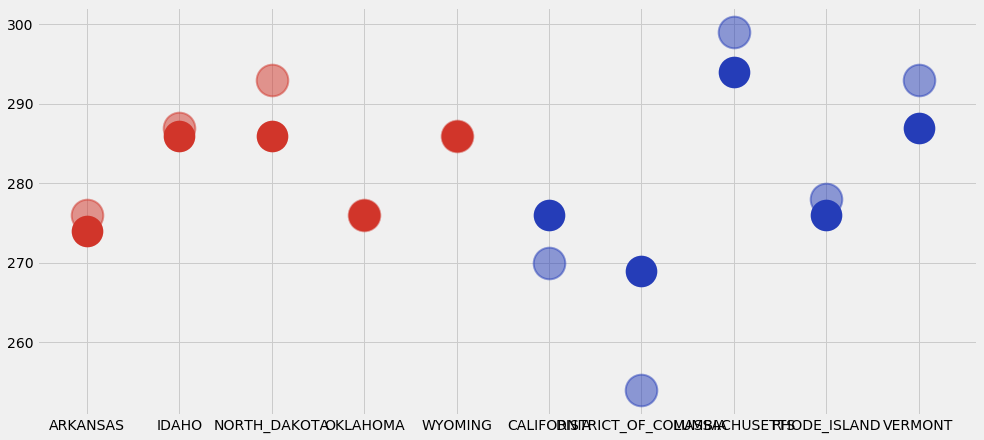

In [7]:
colors = {
    "republican": "#d1352a",
    "democrat": "#253db8"
}

fig, ax = plt.subplots(figsize = (15,7))

# 2009 red states
red_plot_2009 = plt.scatter(
    x = red_states.loc[red_states["YEAR"]==2009, "STATE"],
    y = red_states.loc[red_states["YEAR"]==2009, "AVG_MATH_8_SCORE"],
    c = colors["republican"],
    s = 1000,
    alpha = 0.5,
    linewidth = 2
)

# 2019 red states
red_plot_2019 = plt.scatter(
    x = red_states.loc[red_states["YEAR"]==2019, "STATE"],
    y = red_states.loc[red_states["YEAR"]==2019, "AVG_MATH_8_SCORE"],
    c = colors["republican"],
    s = 1000,
    alpha = 1,
    linewidth = 0
)

# 2009 blue states
blue_plot_2009 = plt.scatter(
    x = blue_states.loc[blue_states["YEAR"]==2009, "STATE"],
    y = blue_states.loc[blue_states["YEAR"]==2009, "AVG_MATH_8_SCORE"],
    c = colors["democrat"],
    s = 1000,
    alpha = 0.5,
    linewidth = 2
)

# 2019 blue states
blue_plot_2009 = plt.scatter(
    x = blue_states.loc[blue_states["YEAR"]==2019, "STATE"],
    y = blue_states.loc[blue_states["YEAR"]==2019, "AVG_MATH_8_SCORE"],
    c = colors["democrat"],
    s = 1000,
    alpha = 1,
    linewidth = 0
)

plt.savefig("before.png") 
plt.show()

# Making our changes:
### We are going to make the following style changes, in order:

- widen the y limit
- bold the x axis
- add a vertical line to split the plot by party affiliation
- label both sides of the plot with text
- change the x-tick labels
- annotate the meaning of different opacities with text
- draw the bars between circles with a `for` loop
- remove the vertical grid lines and customize the horizontal ones
- add a title
- add a subtitle
- add a signature bar
- change background colors
- remove spines
- save the figure for future Tweeting (who doesn't love a good chart after all?)

Each step is commented, with special focus on the loop that draws the bars. Feel free to ask questions!

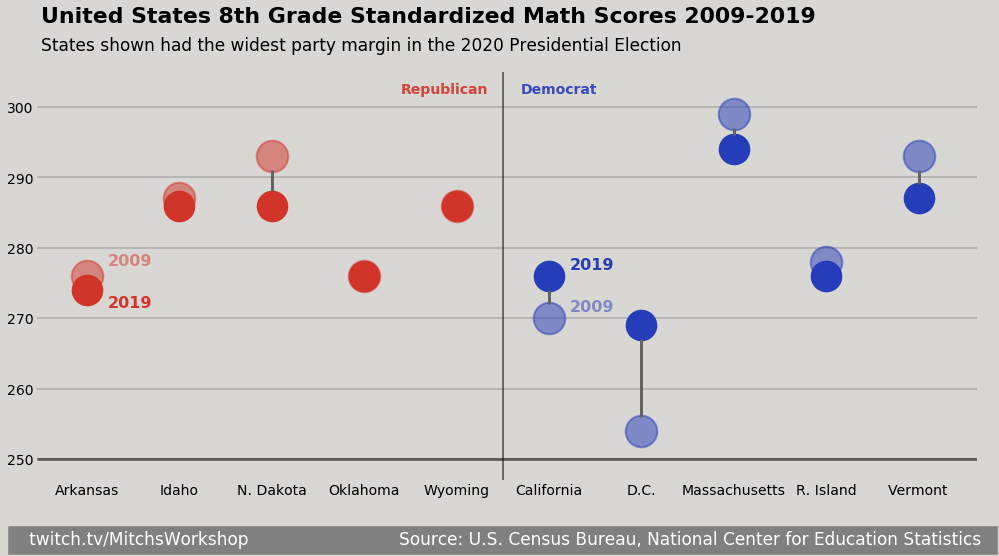

In [8]:
colors = {
    "republican": "#d1352a",
    "democrat": "#253db8"
}

fig, ax = plt.subplots(figsize = (15,7))

# 2009 red states
plt.scatter(
    x = red_states.loc[red_states["YEAR"]==2009, "STATE"],
    y = red_states.loc[red_states["YEAR"]==2009, "AVG_MATH_8_SCORE"],
    c = colors["republican"],
    s = 1000,
    alpha = 0.5,
    linewidth = 2
)

# 2019 red states
plt.scatter(
    x = red_states.loc[red_states["YEAR"]==2019, "STATE"],
    y = red_states.loc[red_states["YEAR"]==2019, "AVG_MATH_8_SCORE"],
    c = colors["republican"],
    s = 1000,
    alpha = 1,
    linewidth = 0
)

# 2009 blue states
plt.scatter(
    x = blue_states.loc[blue_states["YEAR"]==2009, "STATE"],
    y = blue_states.loc[blue_states["YEAR"]==2009, "AVG_MATH_8_SCORE"],
    c = colors["democrat"],
    s = 1000,
    alpha = 0.5,
    linewidth = 2
)

# 2019 blue states
plt.scatter(
    x = blue_states.loc[blue_states["YEAR"]==2019, "STATE"],
    y = blue_states.loc[blue_states["YEAR"]==2019, "AVG_MATH_8_SCORE"],
    c = colors["democrat"],
    s = 1000,
    alpha = 1,
    linewidth = 0
)


### CHANGES TO DEFAULT PLOT ###

# set new y limit
plt.ylim((247, 305))

# bold x axis
plt.axhline(
    250, 
    linewidth = 3,
    color = "black",
    alpha = 0.5
)

# split plot by party
plt.axvline(
    4.5,
    linewidth = 2,
    color = "black",
    alpha = 0.5
)

# label sides of vline
# republican
plt.text(
    x = 3.4,
    y = 302,
    s = "Republican",
    color = colors["republican"],
    fontweight = "bold",
    fontsize = 14,
    alpha = 0.9
)

# democrat
plt.text(
    x = 4.7,
    y = 302,
    s = "Democrat",
    color = colors["democrat"],
    fontweight = "bold",
    fontsize = 14,
    alpha = 0.9
)

# change xtick labels
custom_labels = [
    "Arkansas", 
    "Idaho", 
    "N. Dakota", 
    "Oklahoma", 
    "Wyoming", 
    "California", 
    "D.C.", 
    "Massachusetts", 
    "R. Island", 
    "Vermont"
]
ax.set_xticklabels(custom_labels)

# label different opacities on both sides of plot
# republican 2009
plt.text(
    x = 0.22,
    y = 277.5,
    s = "2009",
    color = colors["republican"],
    alpha = 0.5,
    fontweight = "bold",
    fontsize = 16
)

# republican 2019
plt.text(
    x = 0.22,
    y = 271.5,
    s = "2019",
    color = colors["republican"],
    alpha = 1,
    fontweight = "bold",
    fontsize = 16
)

# democrat 2009
plt.text(
    x = 5.22,
    y = 271,
    s = "2009",
    color = colors["democrat"],
    alpha = 0.5,
    fontweight = "bold",
    fontsize = 16
)

# democrat 2019
plt.text(
    x = 5.22,
    y = 277,
    s = "2019",
    color = colors["democrat"],
    alpha = 1,
    fontweight = "bold",
    fontsize = 16
)

### DRAW BARS BETWEEN CIRCLES ###
"""
This loop checks to see if there is a wide enough gap to draw a line between, then draws it.
Setting the values was a matter of trial and error. If you change the dot size, these won't work.
And that's fine! Just adjust accordingly.

I originally hand-drew each of them and it took hours. I highly recommend automating this process.
This was the best way I could find to do so, but I am open to suggestions!

Note: With qualitative data in matplotlib, the different values (in this case, states) are numbered
0,1,2,... behind the scenes. So if we draw a point at (0,250), it will appear above Arkansas.
"""

# ordered list of states as they appear on the x axis
states = [
    "ARKANSAS",
    "IDAHO",
    "NORTH_DAKOTA",
    "OKLAHOMA",
    "WYOMING",
    "CALIFORNIA",
    "DISTRICT_OF_COLUMBIA",
    "MASSACHUSETTS",
    "RHODE_ISLAND",
    "VERMONT"
]

# i will be the numeric x-value on the plot
for i,state in enumerate(states):
    # subset by state
    st = subset[subset["STATE"]==state]
    
    # get scores for both years
    score_09 = st.loc[st["YEAR"]==2009, "AVG_MATH_8_SCORE"].values[0]
    score_19 = st.loc[st["YEAR"]==2019, "AVG_MATH_8_SCORE"].values[0]
    
    # find max and min score out of the two given
    big_score = max([score_09, score_19])
    small_score = min([score_09, score_19])
    
    # if there is a large enough gap, draw a line
    if big_score - small_score > 4.5: # 4.5 is the gap needed to have visible space between points
        plt.plot(
            [i,i], # x1, x2
            [small_score+2, big_score-2], # y1, y2 allowing padding to accomodate the size of the data point
            c = "#636363",
            linewidth = 3,
            alpha = 1
        )

# remove vertical grid (removing the grid first fixed some weird behavior)
plt.grid(False)
plt.grid(linewidth = 1.5, axis = "y", color = "black", alpha = 0.2)

# add title text
plt.text(
    x = -0.5,
    y = 312,
    s = "United States 8th Grade Standardized Math Scores 2009-2019",
    fontsize = 22,
    fontweight = "bold"
)

# add subtitle text
plt.text(
    x = -0.5,
    y = 308,
    s = "States shown had the widest party margin in the 2020 Presidential Election",
    fontsize = 17,
    fontweight = "regular"
)

# signature bar (white space necessary for style)
plt.text(
    x = -0.8,
    y = 237.8,
    s = "   twitch.tv/MitchsWorkshop                            Source: U.S. Census Bureau, National Center for Education Statistics  ",
    backgroundcolor = "grey",
    c = "white",
    fontsize = 17
)

# new background colors
face_color = "#d9d7d4"
ax.set_facecolor(face_color)
fig.set_facecolor(face_color)

# remove spines
for s in ["top", "left", "bottom", "right"]:
    ax.spines[s].set_visible(False)

plt.savefig("after.png", bbox_inches = "tight", facecolor = face_color) # for twitter @MitchsWorkshop
plt.show()